In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tnrange, tqdm_notebook, tqdm
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Set style for plots
sns.set(style='whitegrid')


# Load the data
df = pd.read_pickle('tweets_with_labels.pkl')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,...,joy_prob,love_prob,optimism_prob,pessimism_prob,sadness_prob,surprise_prob,trust_prob,emotion_label,irony_label,sentiment_label
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,...,0.018759,0.002608,0.014057,0.064718,0.156217,0.087268,0.007338,anticipation,False,negative
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...",...,0.189257,0.002931,0.123739,0.003583,0.002220,0.027095,0.023936,anticipation,False,positive
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332.0,924.0,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",...,0.106353,0.002909,0.047832,0.003104,0.002245,0.043926,0.024446,anticipation,False,neutral
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129.0,14.0,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,...,0.626578,0.003508,0.301623,0.000384,0.000326,0.003269,0.013409,joy,False,positive
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472.0,10482.0,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,...,0.014121,0.001179,0.562736,0.024811,0.017232,0.005735,0.025889,optimism,False,positive


In [2]:
# Convert 'Date' to datetime type and set as index
df['Date'] = pd.to_datetime(df['date'])
df.set_index('Date', inplace=True)

# Check the prepared dataframe
print(df.head())

                                                    user_name  \
Date                                                            
2021-02-10 23:59:04                             DeSota Wilson   
2021-02-10 23:58:48                                  CryptoND   
2021-02-10 23:54:48                                 Tdlmatias   
2021-02-10 23:54:33                      Crypto is the future   
2021-02-10 23:54:06  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader   

                       user_location  \
Date                                   
2021-02-10 23:59:04      Atlanta, GA   
2021-02-10 23:58:48              NaN   
2021-02-10 23:54:48  London, England   
2021-02-10 23:54:33              NaN   
2021-02-10 23:54:06           Europa   

                                                      user_description  \
Date                                                                     
2021-02-10 23:59:04  Biz Consultant, real estate, fintech, startups...   
2021-02-10 23:58:48  😎 BITCOINLIVE is a D

In [3]:
df.drop(['irony_prob', 'anger_prob',
       'anticipation_prob', 'disgust_prob', 'fear_prob', 'joy_prob',
       'love_prob', 'optimism_prob', 'pessimism_prob', 'sadness_prob',
       'surprise_prob', 'trust_prob', 'emotion_label', 'irony_label',
       'sentiment_label'], axis = 1, inplace = True)
print(df.head())

                                                    user_name  \
Date                                                            
2021-02-10 23:59:04                             DeSota Wilson   
2021-02-10 23:58:48                                  CryptoND   
2021-02-10 23:54:48                                 Tdlmatias   
2021-02-10 23:54:33                      Crypto is the future   
2021-02-10 23:54:06  Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader   

                       user_location  \
Date                                   
2021-02-10 23:59:04      Atlanta, GA   
2021-02-10 23:58:48              NaN   
2021-02-10 23:54:48  London, England   
2021-02-10 23:54:33              NaN   
2021-02-10 23:54:06           Europa   

                                                      user_description  \
Date                                                                     
2021-02-10 23:59:04  Biz Consultant, real estate, fintech, startups...   
2021-02-10 23:58:48  😎 BITCOINLIVE is a D

In [4]:
scores = []
for i, s in tqdm(df.iterrows(), total=df.shape[0],position=0, leave=True):
    try:
        #Here, the score emphasizes sentiments that are strongly positive or negative and de-emphasizes those closer to neutral.
        scores.append((s["positive_prob"]) * ((int(s["user_followers"]))) * ((int(s["user_favourites"])+1)/int(s['user_followers']+1)) *((int(s["is_retweet"])+1)))
    except:
        scores.append(np.nan)
df["score"] = scores
df.head(2)

100%|██████████| 4850000/4850000 [02:29<00:00, 32340.41it/s]


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,negative_prob,neutral_prob,positive_prob,score
Date,,,,,,,,,,,,,,,,,
2021-02-10 23:59:04,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605.0,4838.0,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,0.592906,0.397914,0.009180,44.419015
2021-02-10 23:58:48,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532.0,25483.0,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,0.001663,0.143908,0.854429,21771.052516


In [10]:
tweets_grouped = df.resample('1h').agg({
    'user_followers': 'sum',
    'user_friends': 'sum',
    'user_favourites': 'sum',
    'negative_prob': 'sum',
    'neutral_prob': 'sum',
    'positive_prob': 'sum',
    'score': 'sum'
})
#tweets_grouped['number_of_tweets'] = df.resample('1h').size()
#tweets_grouped = tweets_grouped['2021-02-06':'2023-03-05']  # Filters rows from Feb 10 to Feb 11 inclusive
tweets_grouped.head(5)

,user_followers,user_friends,user_favourites,negative_prob,neutral_prob,positive_prob,score
Date,,,,,,,
2021-02-05 10:00:00,21675.0,6460.0,78957.0,0.121183,6.150877,4.727939,12113.497411
2021-02-05 11:00:00,634191.0,100792.0,304686.0,5.158497,57.012119,25.829384,91602.654237
2021-02-05 12:00:00,646404.0,191468.0,586447.0,11.037440,69.095984,58.866577,217554.126581
2021-02-05 13:00:00,506222.0,227179.0,1071161.0,8.531332,74.253073,48.215595,369605.970996
2021-02-05 14:00:00,511865.0,150554.0,825921.0,13.646859,82.375831,63.977310,297429.258015


In [16]:
bitcoin = pd.read_csv('bitcoin_2017_to_2023.csv')
bitcoin['Date'] = pd.to_datetime(bitcoin['timestamp'])
bitcoin.set_index('Date', inplace=True)
print(bitcoin.columns)
# Check the prepared dataframe

crypto_usd_grouped = bitcoin.resample('D')['close'].mean()
#crypto_usd_grouped = crypto_usd_grouped['2021-02-06':'2023-03-05']  # Filters rows from Feb 10 to Feb 11 inclusive
crypto_usd_grouped.head(5)

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume'],
      dtype='object')


Date
2017-08-17    4358.630667
2017-08-18    4230.951715
2017-08-19    4070.712250
2017-08-20    4123.014063
2017-08-21    4035.014465
Freq: D, Name: close, dtype: float64

In [17]:
def crosscorr(datax, datay, lag=0, method="pearson"):
    """ Lag-N cross correlation. 
    Parameters
    —------—
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length

    Returns
    —------—
    crosscorr : float
    """
    return datax.corrwith(datay.shift(lag), method=method)['score']
# xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, m ='pearson' ) for i in range(-20,20)]
# tweets_grouped.corrwith(crypto_usd_grouped,method='pearson')

In [18]:
beggining = max(tweets_grouped.index.min().replace(tzinfo=None), crypto_usd_grouped.index.min())
end = min(tweets_grouped.index.max().replace(tzinfo=None), crypto_usd_grouped.index.max())
tweets_grouped = tweets_grouped[beggining:end]
crypto_usd_grouped = crypto_usd_grouped[beggining:end]

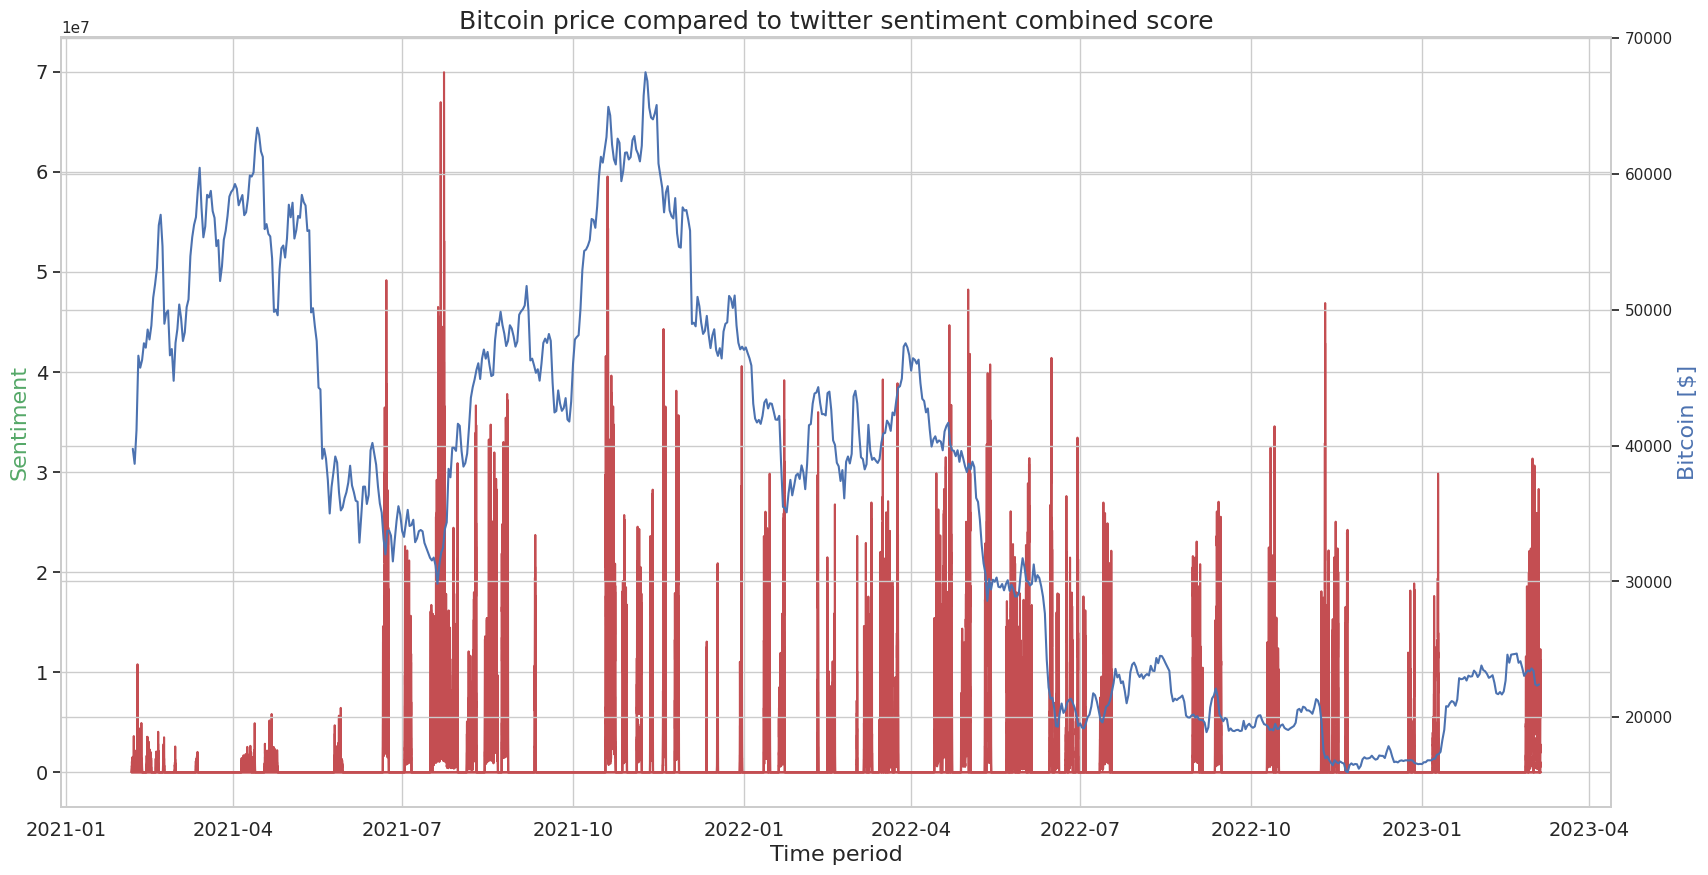

<Figure size 640x480 with 0 Axes>

In [19]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Bitcoin price compared to twitter sentiment combined score", fontsize=18)
ax1.tick_params(labelsize=14)
ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped, 'r-')
ax2.plot_date(crypto_usd_grouped.index, crypto_usd_grouped, 'b-')

ax1.set_ylabel("Sentiment", color='r', fontsize=16)
ax1.set_xlabel("Time period", fontsize=16)
ax2.set_ylabel("Bitcoin [$]", color='b', fontsize=16)
plt.show()
plt.savefig('crypto_evolution_vs_twitter_sentiment', dpi=1000)


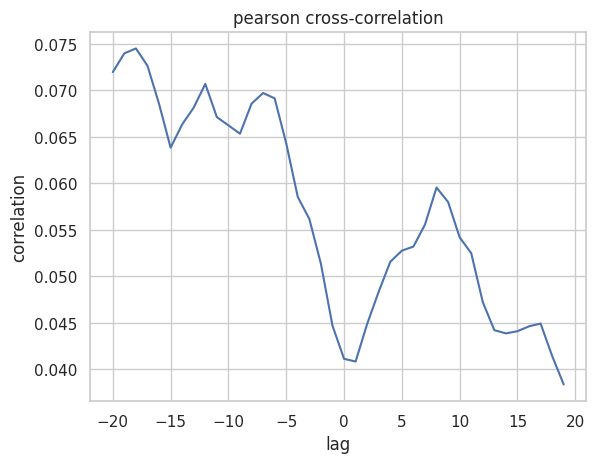

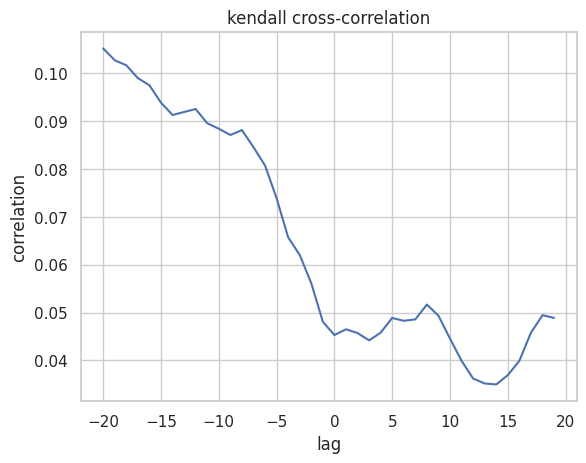

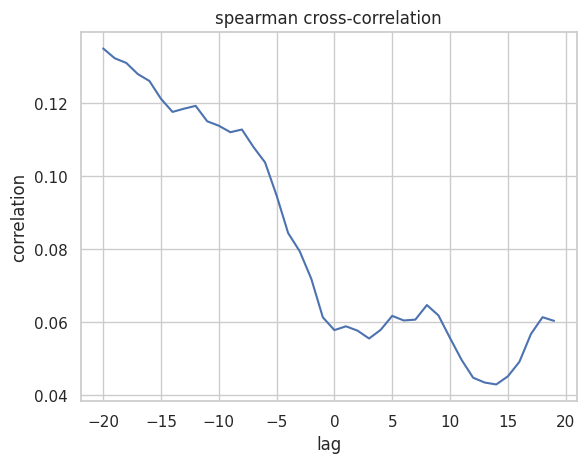

In [20]:
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="pearson") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("pearson cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="kendall") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("kendall cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i, method="spearman") for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("spearman cross-correlation")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()

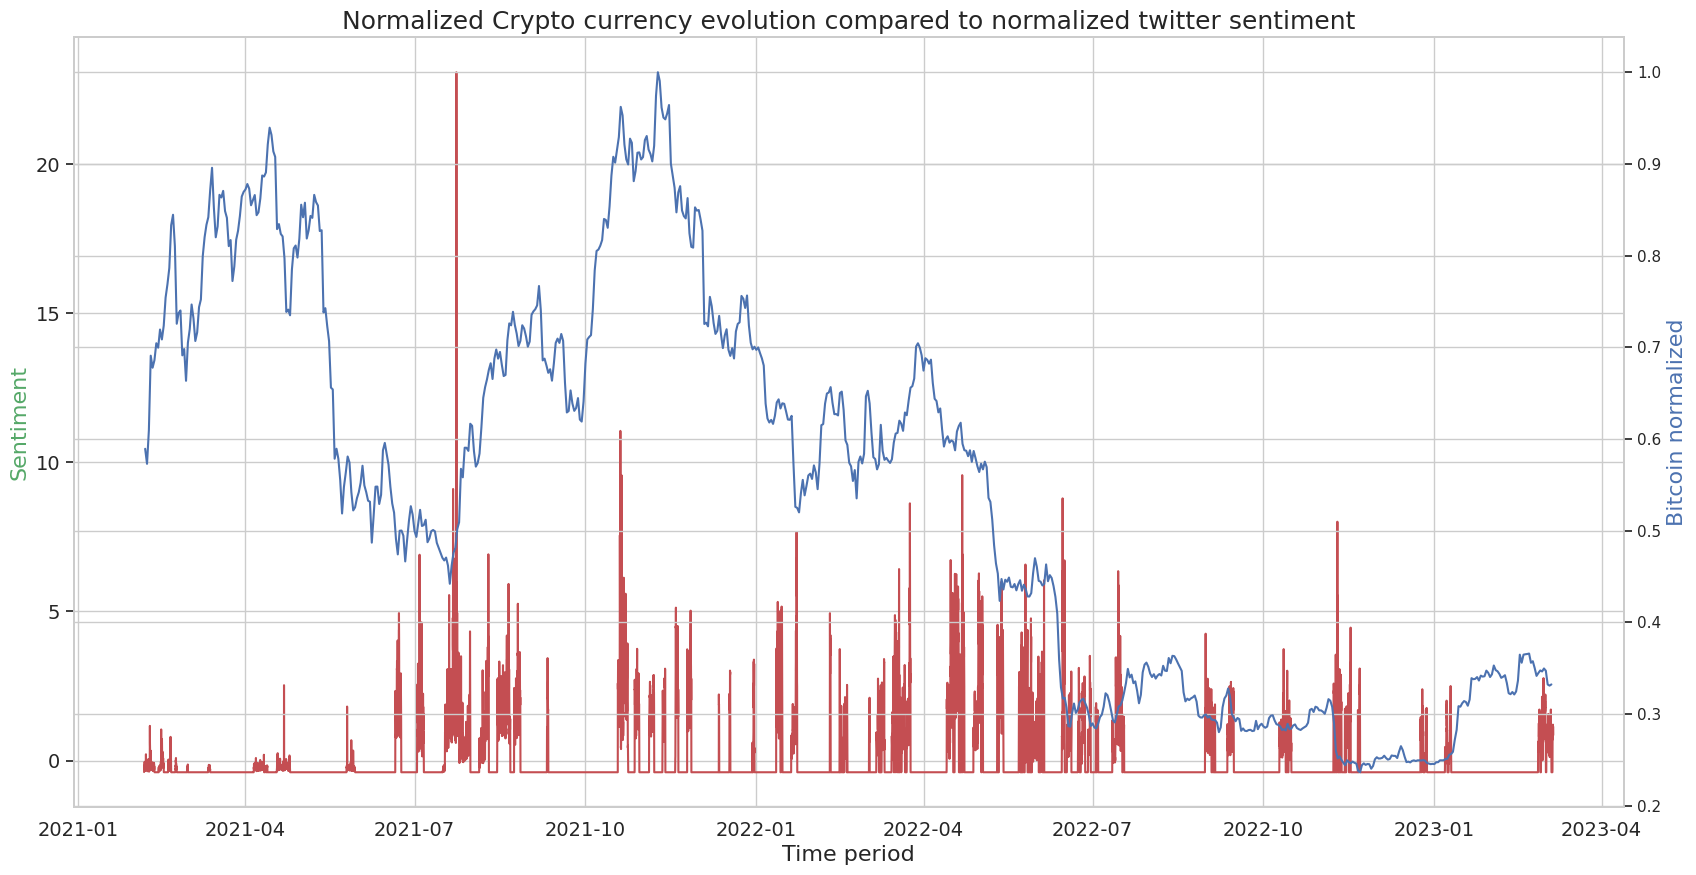

<Figure size 640x480 with 0 Axes>

In [26]:
# Normalize time series data
min_max_scaler = preprocessing.StandardScaler()
score_scaled = min_max_scaler.fit_transform(tweets_grouped['score'].values.reshape(-1,1))
tweets_grouped['normalized_score'] = score_scaled
# crypto_used_grouped_scaled = min_max_scaler.fit_transform(crypto_usd_grouped.values.reshape(-1,1))
crypto_used_grouped_scaled = crypto_usd_grouped / max(crypto_usd_grouped.max(), abs(crypto_usd_grouped.min()))
# crypto_usd_grouped['normalized_price'] = crypto_used_grouped_scaled

fig, ax1 = plt.subplots(figsize=(20,10))
ax1.set_title("Normalized Crypto currency evolution compared to normalized twitter sentiment", fontsize=18)
ax1.tick_params(labelsize=14)

ax2 = ax1.twinx()
ax1.plot_date(tweets_grouped.index, tweets_grouped['normalized_score'], 'r-')
ax2.plot_date(crypto_usd_grouped.index, crypto_used_grouped_scaled, 'b-')

ax1.set_ylabel("Sentiment", color='g', fontsize=16)
ax1.set_xlabel("Time period", fontsize=16)
ax2.set_ylabel("Bitcoin normalized", color='b', fontsize=16)
plt.show()
plt.savefig('normalized_crypto_evolution_vs_twitter_sentiment', dpi=1000)

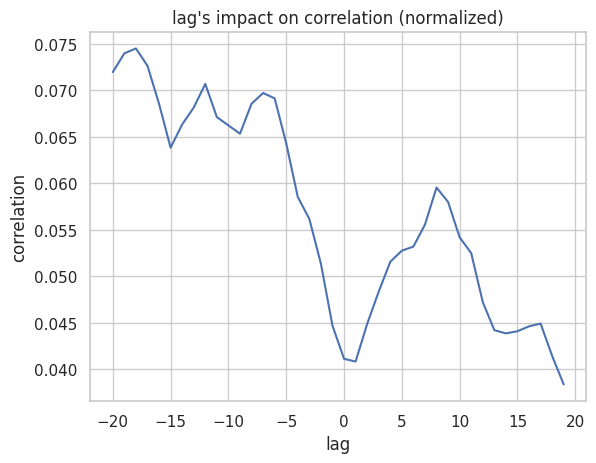

In [22]:
#tweets_grouped.T.corr(crypto_usd_grouped, method='pearson')
#tweets_grouped.T.autocorr(crypto_usd_grouped, lag=20)
xcov = [crosscorr(tweets_grouped, crypto_usd_grouped, lag=i) for i in range(-20,20)]
plt.plot(range(-20,20), xcov)
plt.title("lag's impact on correlation (normalized)")
plt.xlabel("lag")
plt.ylabel("correlation")
plt.show()